In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats, signal
from scipy.spatial import cKDTree

import sys
sys.path.append('../scripts')  # Path relative to the notebook

import cem_utils as utils  # Now you can import it
import buoypy as bp

In [2]:
wave_climate = np.loadtxt('../data/cem/umpqua_wave_climate_data.txt')

Hs = wave_climate[0]
Tp = wave_climate[1]
Dir = wave_climate[2]

xy = np.loadtxt('../data/cem/coquille_pt_coords.txt')

# shoreline
x=xy[:,0]
y=xy[:,1]
dx=100
dy=100

# check the orentation by uncommenting the line below
# plt.plot(x,y)

In [3]:
# Stack and sort by y (column), then x (row)
sorted_indices = np.lexsort((y,x))

# Apply the sorted order
x_sorted = x[sorted_indices]
y_sorted = y[sorted_indices]

#plt.plot(x_sorted,y_sorted)

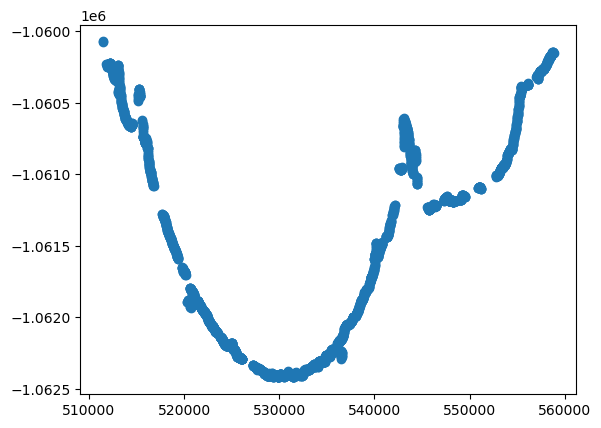

In [4]:
xnew,ynew = utils.rotate_shoreline(x_sorted,y_sorted, -71)

plt.scatter(xnew,ynew)

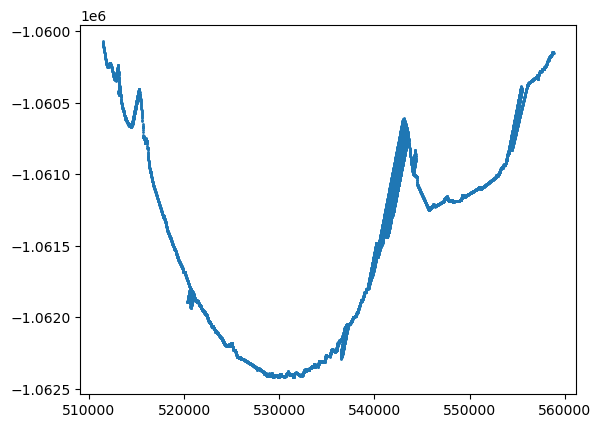

In [5]:
x, y = utils.fill_gaps(xnew, ynew, 10)

# check the orentation by uncommenting the line below
plt.scatter(x,y, s=1)

# if it isnt right, input an angle into the function above and rotate manually
# if it looks good, run the cell below

In [6]:
dx=100
dy=100
xg,yg = utils.shoreline_to_grid(x,y,dx,dy)

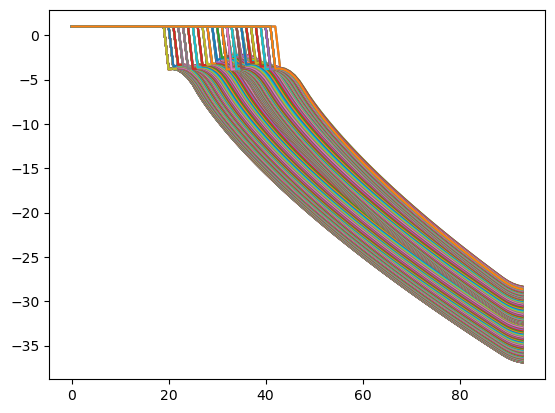

In [7]:
A=0.1 
b=(2/3)
pad=20
zg, dist_map = utils.create_dean_bathy(x,y,xg,yg,pad,A,b)

plt.plot(zg)
plt.show()

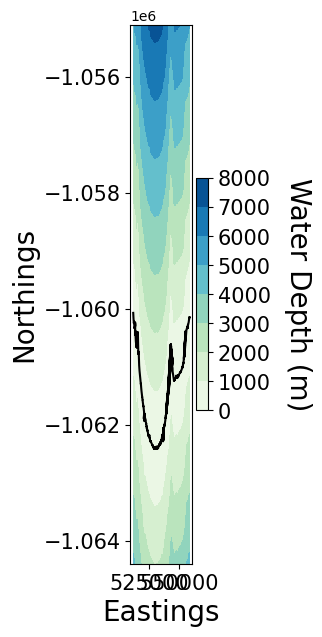

In [8]:
M,N = zg.shape
s = M/N
plt.figure(figsize=(int(s*8),7))
Bathy = plt.contourf(xg, yg, dist_map, cmap=plt.cm.GnBu)
cbar = plt.colorbar(Bathy)
cbar.ax.set_ylabel('Water Depth (m)', fontsize=20, rotation=-90, labelpad=30)
plt.xlabel('Eastings', fontsize=20)
plt.ylabel('Northings', fontsize=20)
plt.tick_params('both', labelsize=15)
cbar.ax.tick_params('y', labelsize=15)
Shore = plt.plot(x, y, 'k')

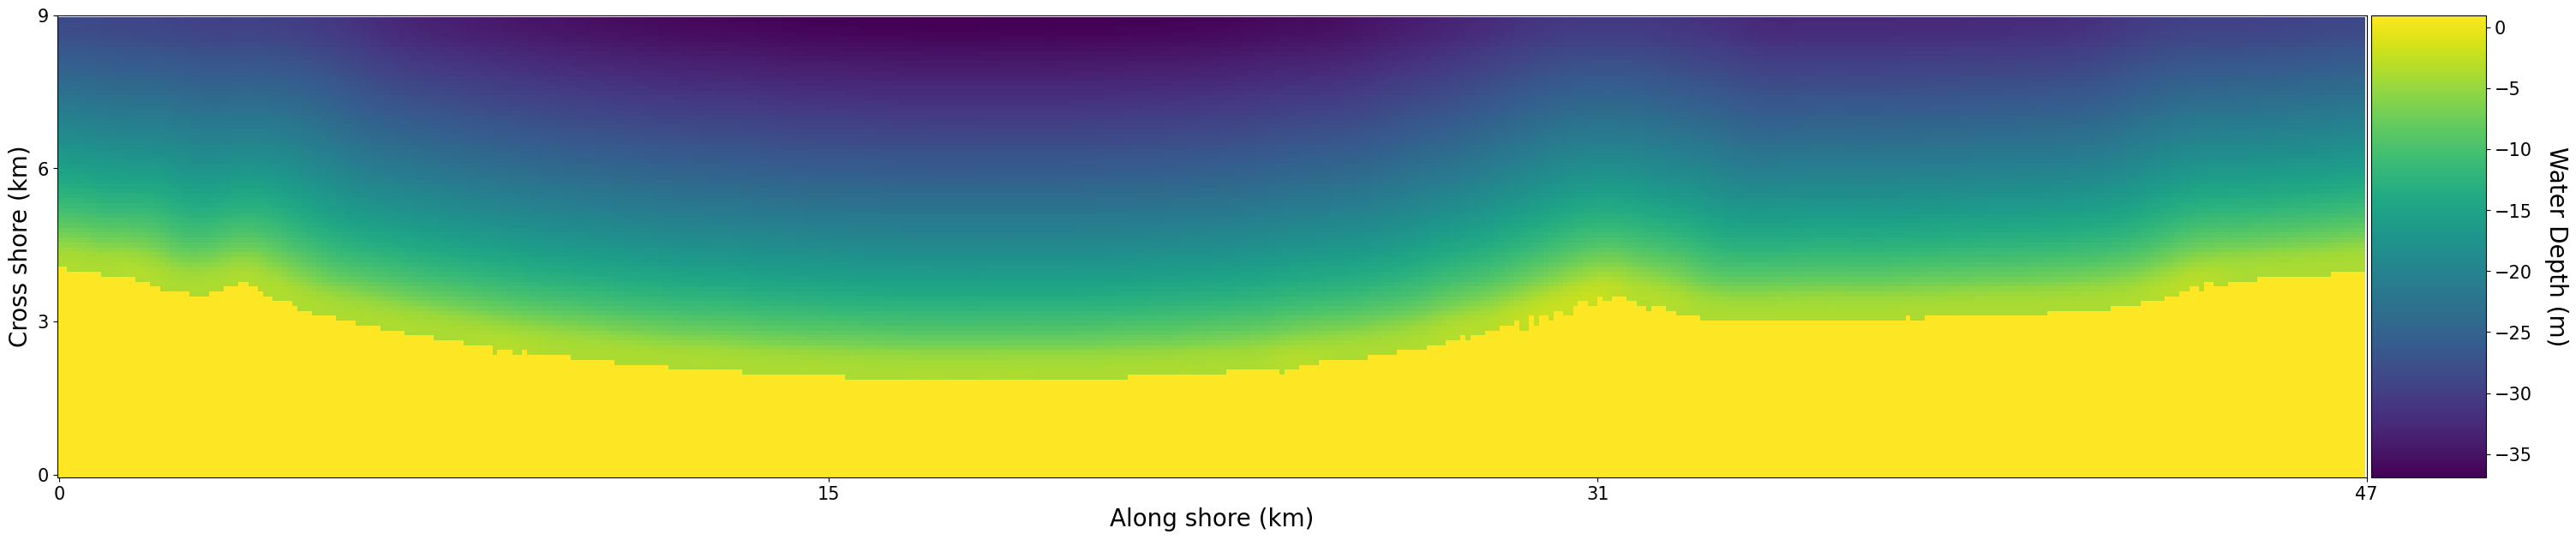

In [9]:
utils.plot_coast(zg,dx,dy)

In [10]:
shelf_slope = utils.find_shelf_slope(zg, dx) ##This should be on the order of 0.001. If not you may need to find this manually
# estimation of shoreface parameters:
shoreface_slope = -4*shelf_slope ## the shoreface is steeper than the shelf
shoreface_depth = 0 # depth meters

In [11]:
from pymt.models import Cem, Waves
cem = Cem()
waves = Waves()
#convert wave direction to asymmetry term
Ap = float(abs((Dir-71)-270)/180)

#convert wave direction to asymmetry term
params = {
    
    ## CEM 
    'grid_spacing'    : dx,                #meters
    'shelf_slope'     : shelf_slope,
    'shoreface_depth' : shoreface_depth,   #meters
    'shoreface_slope' : shoreface_slope,
    'model__time_step': 1,               #days
    
    ##WAVES
    'wave_height' : Hs, #meters
    'wave_period' : Tp, #seconds
    'wave_angle_highness': 0.5, #important param
    'wave_angle_asymmetry': Ap
    
}

Setting end time to 3650
CEM: trying to open file: cem.txt
CEM: line: 94, 472, 100, 1

CEM: number of rows, columns: 94, 472
*** Grid size is (0,0)
*** Requested size is (94,944)
*** New grid size is (94,944)


Condition Initial 


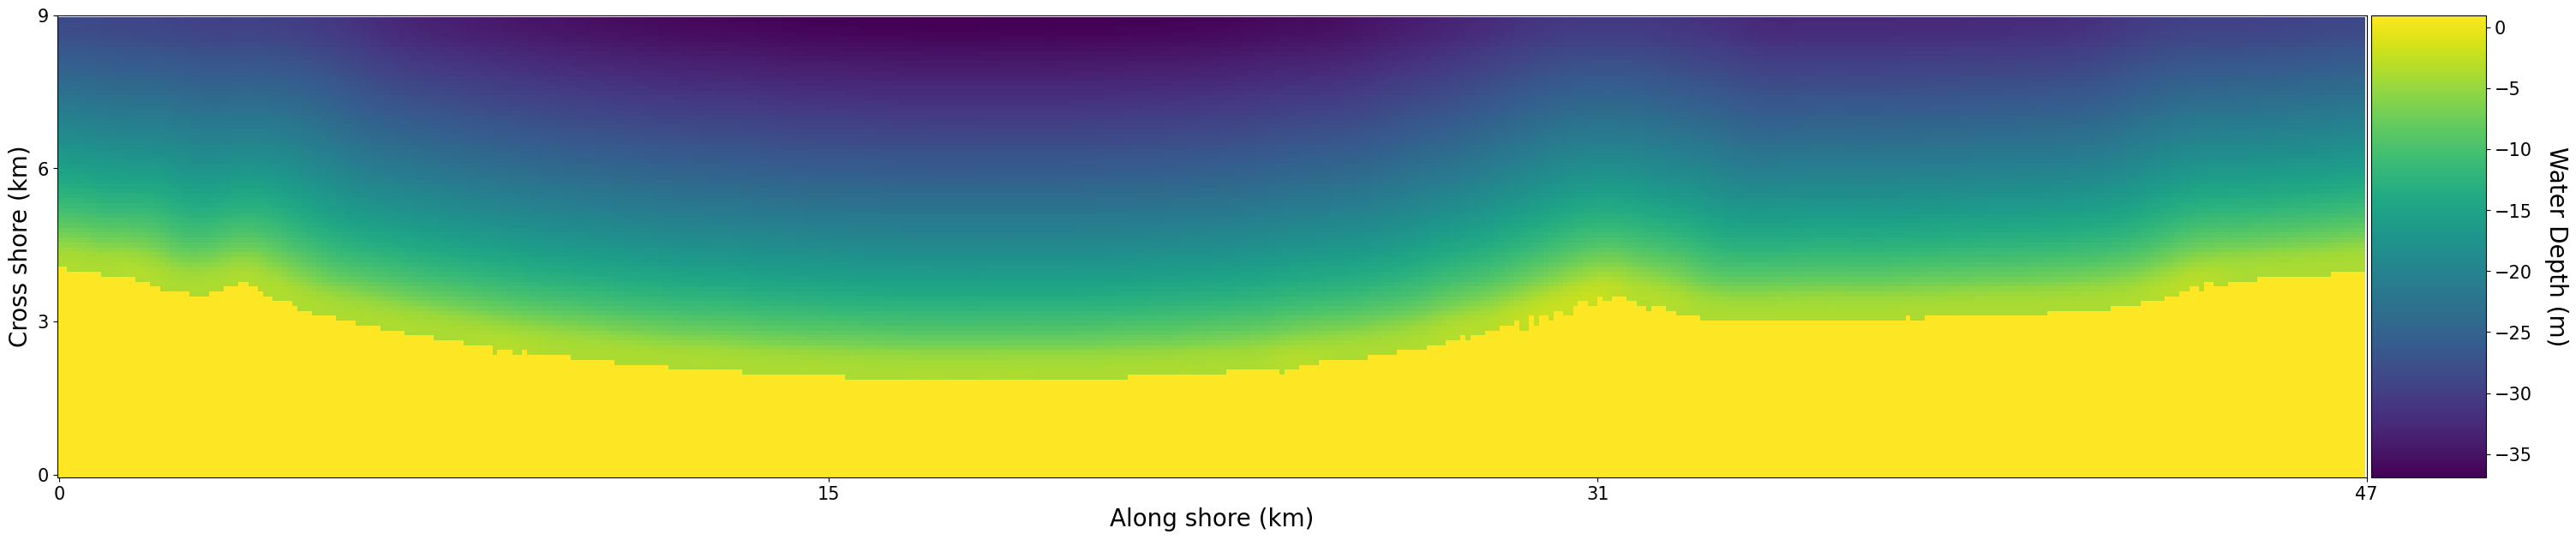

In [12]:
domain = zg
utils.initialize_models(params,domain,cem,waves,set_land=True)
land = cem.get_value('land_surface__elevation')
land = land.reshape(  domain.shape  )
#plot_coast(domain,dx,dy)
utils.plot_coast(land,dx,dy)

/var/folders/kr/t52nlmpn6n38qycgmd0q087c0000gn/T/ipykernel_71459/231965024.py:5: DeprecationWarning: Call to deprecated method get_var_units. (use var_units)
  cem.get_var_units("land_surface_water_sediment~bedload__mass_flow_rate")


'kg / s'

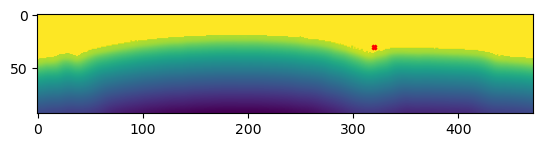

In [13]:
qs = np.zeros_like(land)
qs[30, 320] = 100
plt.imshow(land)
plt.scatter(320, 30, c='r', s=10, marker='X')
cem.get_var_units("land_surface_water_sediment~bedload__mass_flow_rate")

In [19]:
cem.get_output_var_names()

('basin_outlet~coastal_center__x_coordinate',
 'basin_outlet~coastal_water_sediment~bedload__mass_flow_rate',
 'land_surface__elevation',
 'sea_water__depth',
 'basin_outlet~coastal_center__y_coordinate',
 'model__time_step')

In [ ]:
cem.update()

In [14]:
help(Cem)

Help on class Cem in module pymt.models:

class Cem(pymt.framework.bmi_bridge.BmiCap)
 |  Basic Model Interface for Cem.
 |  
 |  The Coastline Evolution Model addresses predominately sandy, wave-
 |  dominated coastlines on time scales ranging from years to millenia and
 |  on spatial scales ranging from kilometers to hundreds of kilometers.
 |  CEM simulates planview coastline evolution due to wave-driven
 |  alongshore sediment transport. This model can incorporate river
 |  influence and transport fluvial sediment from one or more point
 |  sources along the coastline.
 |  
 |  Author:
 |  - A. Brad Murray
 |  Version: 0.1.1
 |  License: MIT
 |  DOI: 10.1594/IEDA/100100
 |  URL: http://csdms.colorado.edu/wiki/Model_help:CEM
 |  
 |  
 |  
 |  Parameters
 |  ----------
 |  grid_spacing : float, optional
 |      Grid resolution in cross and along-shore direction [default=1000.0 m]
 |  number_of_cols : int, optional
 |      Number of columns in the computational grid [default=1000 -]


rofillUnderzerofillUnderzerofillUnderzerofillUnderzerofillUnderzerofillUnderzerofillUnderzerofillUnderzerofillUnderzerofillUnderzerofillUnderzerofillUnderzerofillUnderzerofillUnderzerofillUnderzerofillUnderzerofillUnderzerofillUnderzerofillUnderzerofillUnderzerofillUnderzerofillUnderzerofillUnderzerofillUnderzerofillUnderzerofillUnderzerofillUnderzerofillUnderzerofillUnderzerofillUnderzerofillUnderzerofillUnderzerofillUnderzerofillUnderzerofillUnderzerofillUnderzerofillUnderzerofillUnderzerofillUnderzerofillUnderzerofillUnderzerofillUnderzerofillUnderzerofillUnderzerofillUnderzerofillUnderzerofillUnderzerofillUnderzerofillUnderzerofillUnderzerofillUnderzerofillUnderzerofillUnderzerofillUnderzerofillUnderzerofillUnderzerofillUnderzerofillUnderzerofillUnderzerofillUnderzerofillUnderzerofillUnderzerofillUnderzerofillUnderzerofillUnderzerofillUnderzerofillUnderzerofillUnderzerofillUnderzerofillUnderzerofillUnderzerofillUnderzerofillUnderzerofillUnderzerofillUnderzerofillUnderzerofillUnderz

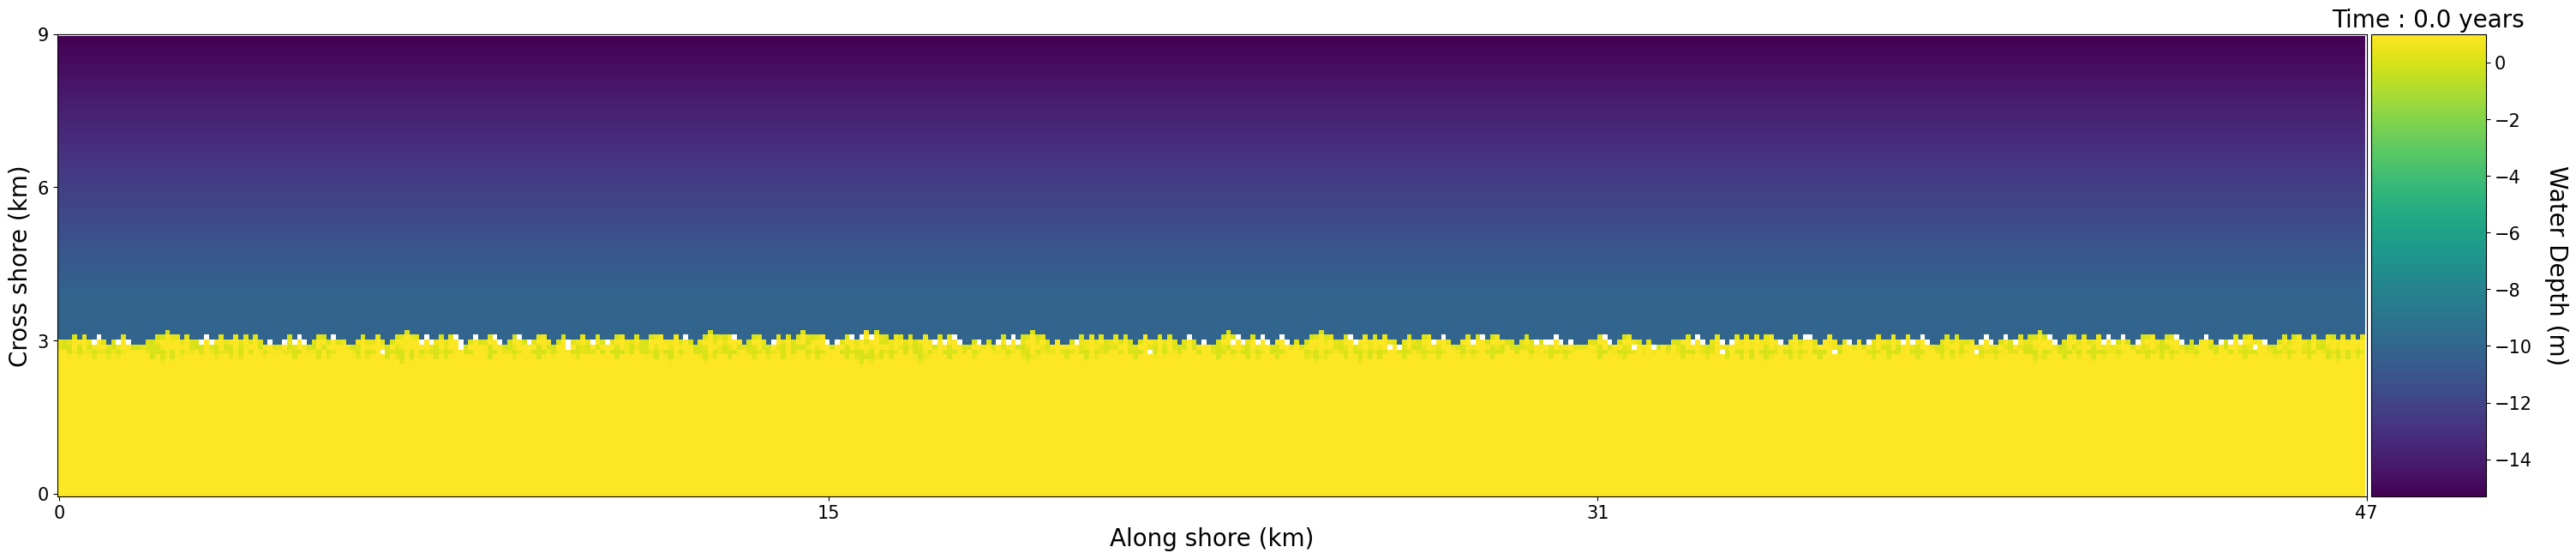

In [ ]:
time_years=20
T = int(365*time_years/cem.get_value('model__time_step'))
qs_vec = np.linspace(4,7,T)
n,m = domain.shape
qs_3 = np.zeros((n,m,T))
qs_3[77,270,:] = qs_vec
utils.run_model_loop(time_years, domain ,cem ,waves, qs_3,animate=True,update_ani_years=1)